In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Define datasets and metrics
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 'real7_Satellite']
metrics = ['rhat', 'test_mse', 'pi_length', 'coverage', 'train_time']

# Results directory
results_dir = Path('results')

def load_and_summarize_metric(metric):
    """Load all dataset results for a specific metric and summarize"""
    summary_data = []
    
    for dataset in datasets:
        file_path = results_dir / f"{dataset}_{metric}.csv"
        
        if file_path.exists():
            try:
                # Read CSV file
                df = pd.read_csv(file_path)
                
                # Calculate mean and standard deviation for each column
                summary_row = {}
                summary_row['Dataset'] = dataset
                
                for column in df.columns:
                    mean_val = df[column].mean()
                    std_val = df[column].std()
                    # Format as mean(std) 
                    summary_row[column] = f"{mean_val:.4f}({std_val:.4f})"
                
                summary_data.append(summary_row)
                
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")
    
    return pd.DataFrame(summary_data)


Summary for RHAT
File not found: results\real2_WineQuality_rhat.csv
File not found: results\real4_Concrete_rhat.csv
File not found: results\real5_BreastTumor_rhat.csv
File not found: results\real6_echoMonths_rhat.csv
                 MultiBART_Rhat_Sigma2 DefaultBART_Rhat_Sigma2 MultiBART_Rhat_RMSE DefaultBART_Rhat_RMSE
Dataset                                                                                                 
real1_Abalone           1.0910(0.0460)          1.0841(0.0269)      1.1185(0.0624)        1.2010(0.0629)
real3_CalHousing        1.5318(0.1197)          1.6633(0.1454)      1.7115(0.1932)        1.7005(0.0521)
real7_Satellite         1.7680(0.1214)          1.7466(0.2422)      1.7640(0.4183)        1.9526(0.3286)


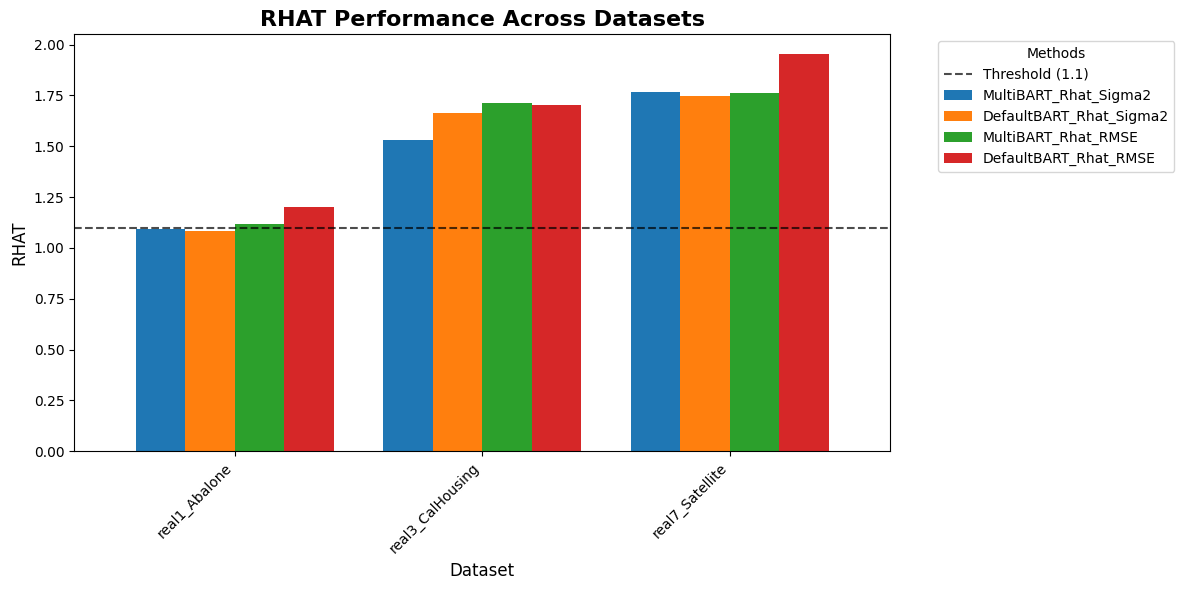


Summary for TEST_MSE
File not found: results\real2_WineQuality_test_mse.csv
File not found: results\real4_Concrete_test_mse.csv
File not found: results\real5_BreastTumor_test_mse.csv
File not found: results\real6_echoMonths_test_mse.csv
                       bart_mtmh            bart             btz              rf             xgb
Dataset                                                                                         
real1_Abalone     5.0030(0.3123)  4.9893(0.3098)  4.9416(0.3074)  4.9276(0.2921)  5.5966(0.2619)
real3_CalHousing  0.2167(0.0061)  0.2252(0.0066)  0.2848(0.0060)  0.2610(0.0090)  0.2213(0.0054)
real7_Satellite   0.6175(0.0460)  0.6093(0.0345)  0.6214(0.0252)  0.5052(0.0262)  0.5390(0.0299)


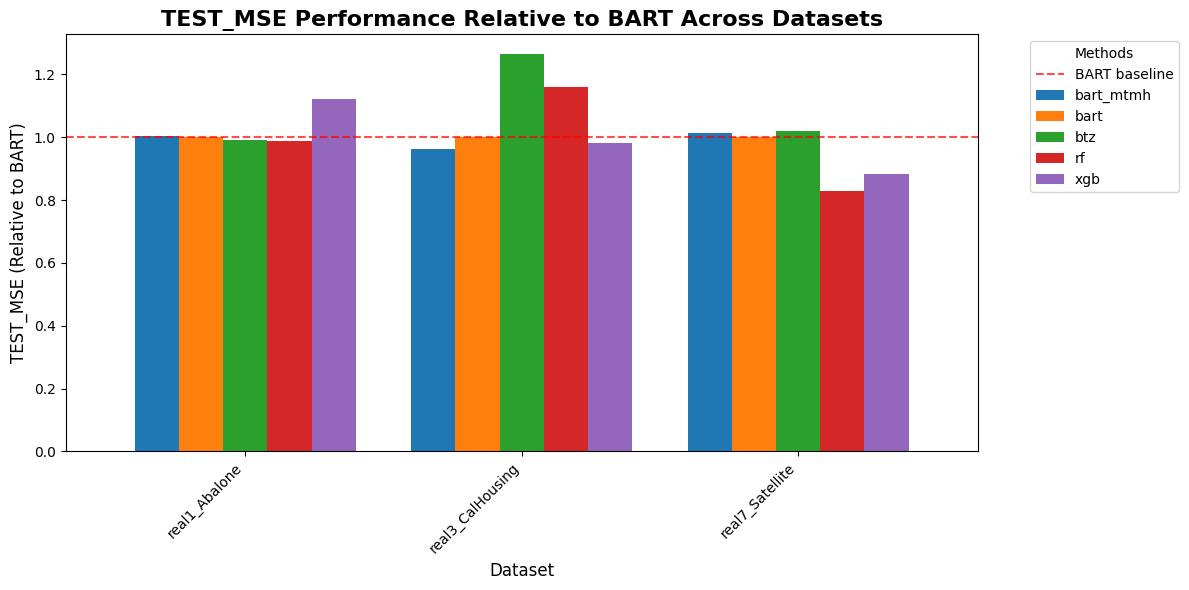


Summary for PI_LENGTH
File not found: results\real2_WineQuality_pi_length.csv
File not found: results\real4_Concrete_pi_length.csv
File not found: results\real5_BreastTumor_pi_length.csv
File not found: results\real6_echoMonths_pi_length.csv
                       bart_mtmh            bart             btz
Dataset                                                         
real1_Abalone     7.9647(0.1156)  8.0635(0.1149)  8.2833(0.0759)
real3_CalHousing  1.5730(0.0162)  1.6974(0.0099)  2.1608(0.0220)
real7_Satellite   1.8362(0.0492)  2.3556(0.0475)  2.8432(0.0525)


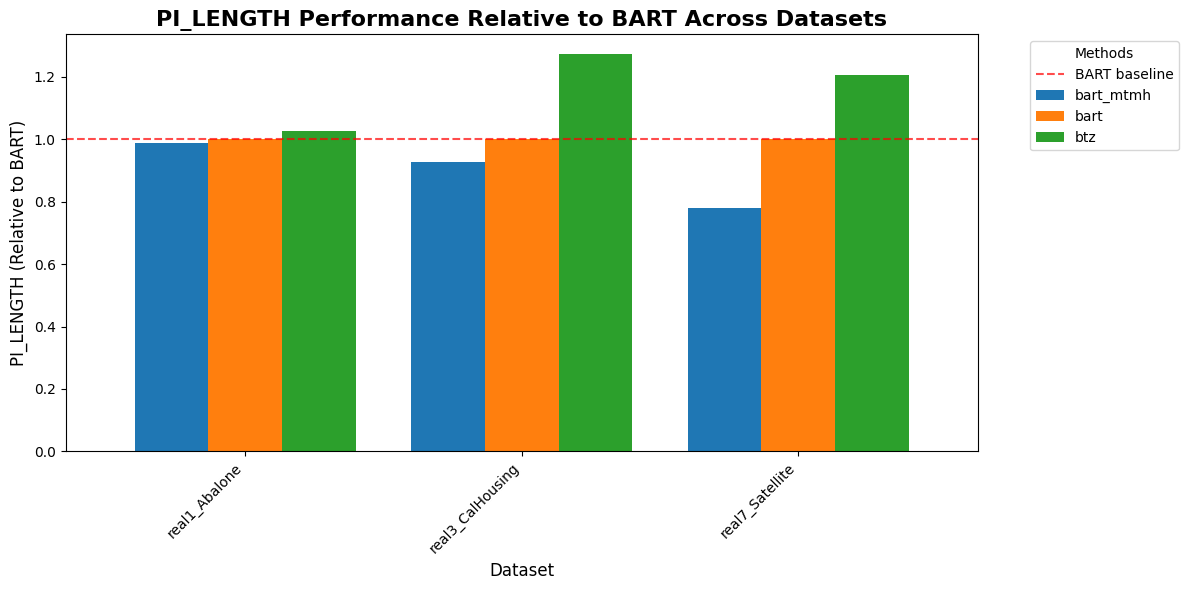


Summary for COVERAGE
File not found: results\real2_WineQuality_coverage.csv
File not found: results\real4_Concrete_coverage.csv
File not found: results\real5_BreastTumor_coverage.csv
File not found: results\real6_echoMonths_coverage.csv
                       bart_mtmh            bart             btz
Dataset                                                         
real1_Abalone     0.9287(0.0090)  0.9283(0.0088)  0.9336(0.0077)
real3_CalHousing  0.9250(0.0046)  0.9323(0.0024)  0.9480(0.0027)
real7_Satellite   0.8530(0.0077)  0.8915(0.0078)  0.9178(0.0067)


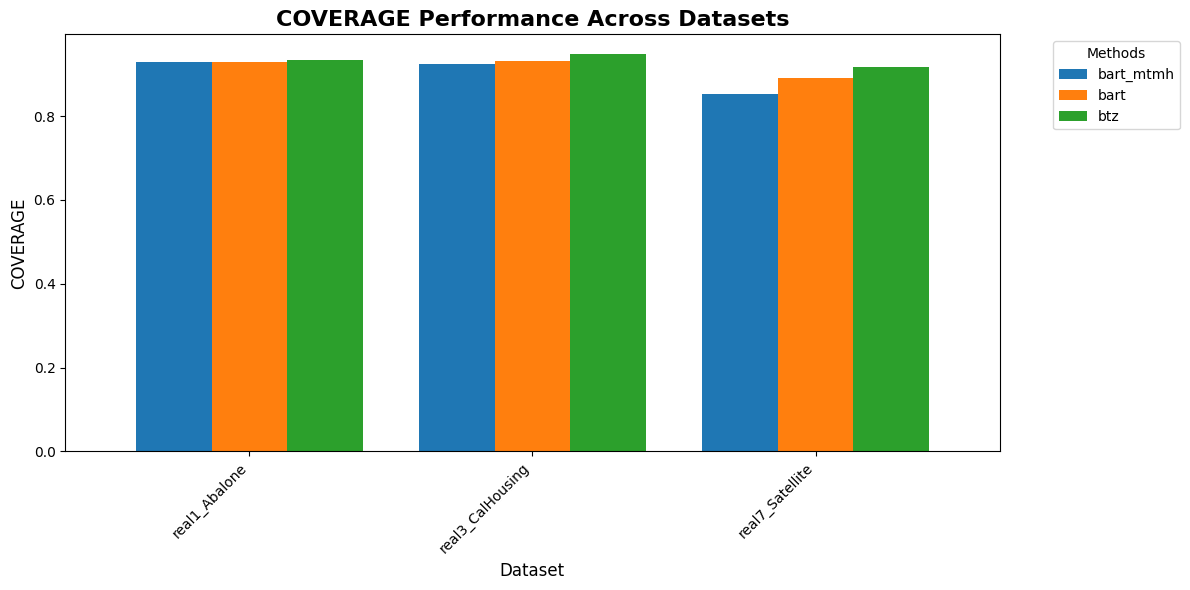


Summary for TRAIN_TIME
File not found: results\real2_WineQuality_train_time.csv
File not found: results\real4_Concrete_train_time.csv
File not found: results\real5_BreastTumor_train_time.csv
File not found: results\real6_echoMonths_train_time.csv
                         bart_mtmh             bart              btz               rf             xgb
Dataset                                                                                              
real1_Abalone     137.5626(1.7097)  24.2024(7.6424)  32.7985(6.8455)   1.4740(0.2199)  0.1760(0.1278)
real3_CalHousing  443.8365(6.1059)  78.7195(7.1346)  47.6492(4.7033)  14.1160(2.9932)  0.3137(0.1833)
real7_Satellite   243.9269(4.3701)  32.5827(1.3984)  49.2667(1.4652)   6.7270(0.0764)  0.3191(0.0528)


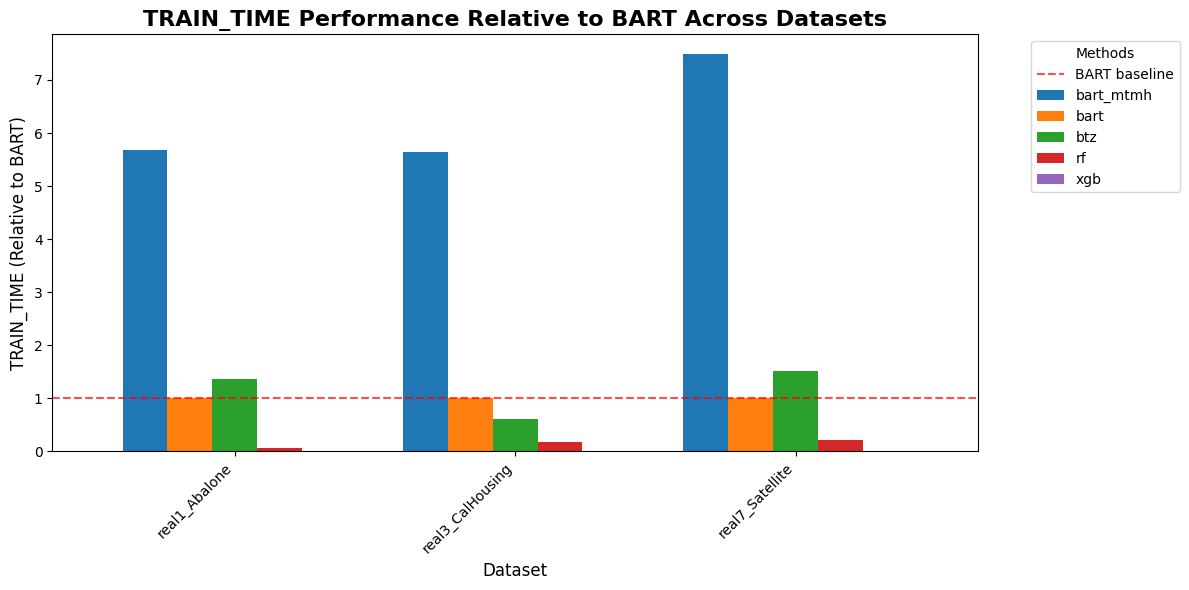

In [2]:
# Generate summary tables for each metric
import matplotlib.pyplot as plt
import seaborn as sns

for metric in metrics:
    print(f"\n{'='*50}")
    print(f"Summary for {metric.upper()}")
    print(f"{'='*50}")
    
    summary_df = load_and_summarize_metric(metric)
    
    if not summary_df.empty:
        # Set Dataset as index
        summary_df.set_index('Dataset', inplace=True)
        
        # Display table
        print(summary_df.to_string())
        
        # Create a numerical version for plotting
        plot_df = summary_df.copy()
        for col in plot_df.columns:
            # Extract mean values from "mean(std)" format
            plot_df[col] = plot_df[col].str.extract(r'(\d+\.?\d*)').astype(float)
        
        # Normalize data relative to BART performance (except for rhat and coverage)
        if metric not in ['rhat', 'coverage'] and 'bart' in plot_df.columns:
            for index in plot_df.index:
                bart_value = plot_df.loc[index, 'bart']
                if bart_value != 0:  # Avoid division by zero
                    plot_df.loc[index] = plot_df.loc[index] / bart_value
        
        # Create grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 6))
        plot_df.plot(kind='bar', ax=ax, width=0.8)
        
        # Customize the plot
        if metric not in ['rhat', 'coverage']:
            ax.set_title(f'{metric.upper()} Performance Relative to BART Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()} (Relative to BART)', fontsize=12)
            # Add horizontal line at y=1 for reference
            ax.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='BART baseline')
        else:
            ax.set_title(f'{metric.upper()} Performance Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()}', fontsize=12)
            if metric == 'rhat':
                # Add horizontal line at y=1.1 for rhat
                ax.axhline(y=1.1, color='black', linestyle='--', alpha=0.7, label='Threshold (1.1)')

        
        ax.set_xlabel('Dataset', fontsize=12)
        ax.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust layout to prevent clipping
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"No data found for {metric}")

File not found: results\real2_WineQuality_tries.csv
File not found: results\real4_Concrete_tries.csv
File not found: results\real5_BreastTumor_tries.csv
File not found: results\real6_echoMonths_tries.csv


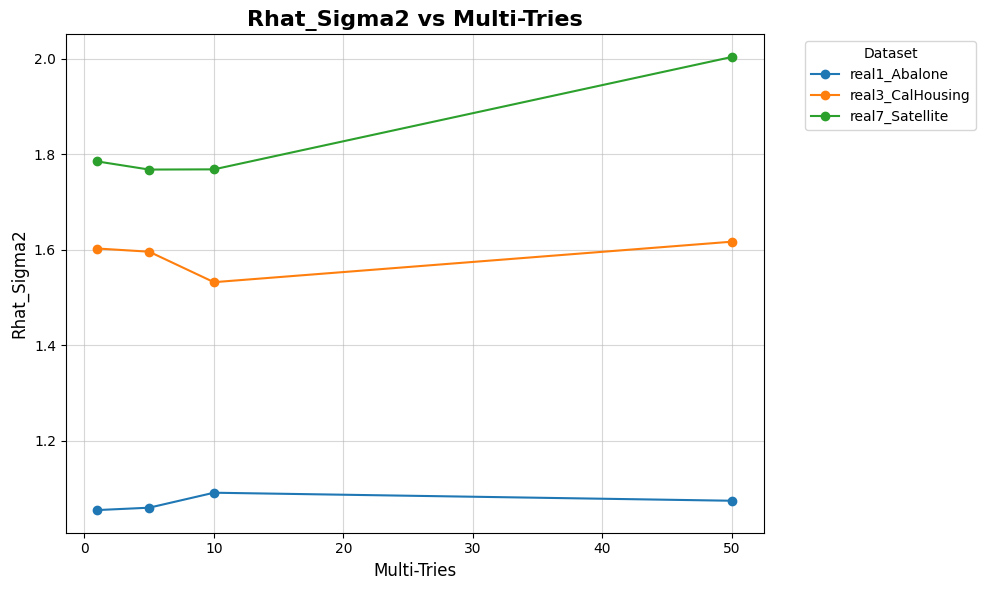

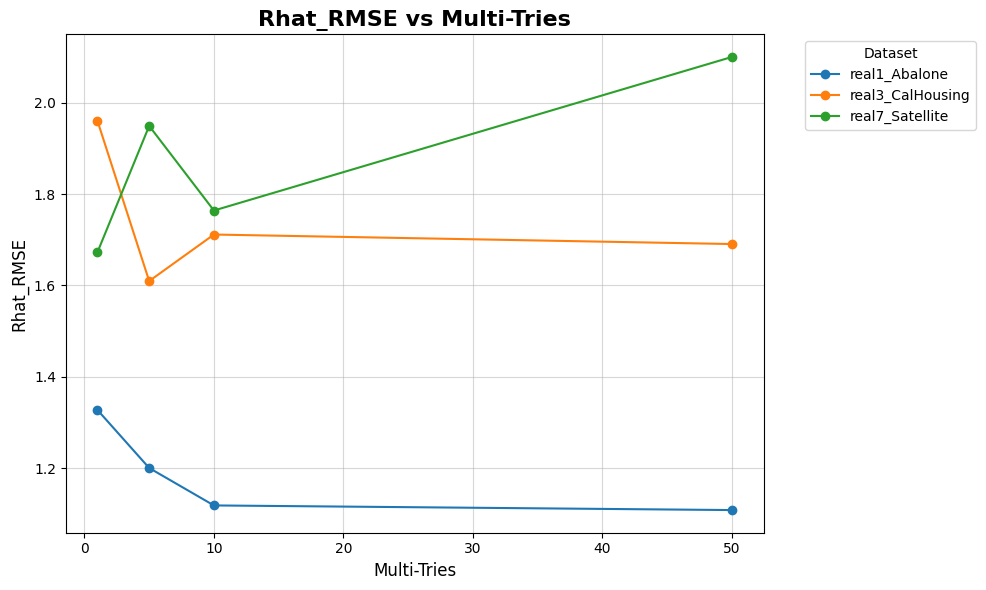

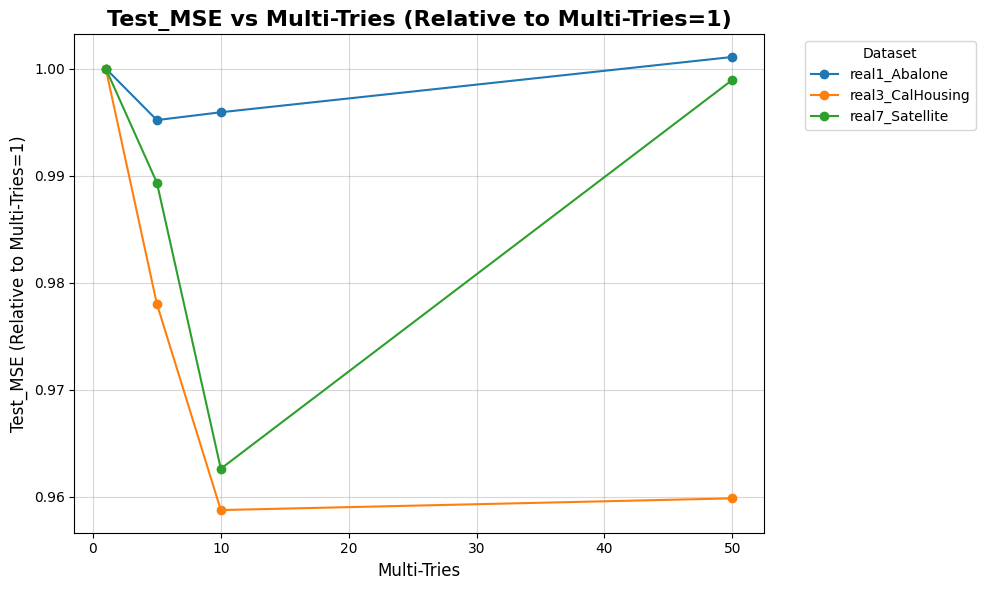

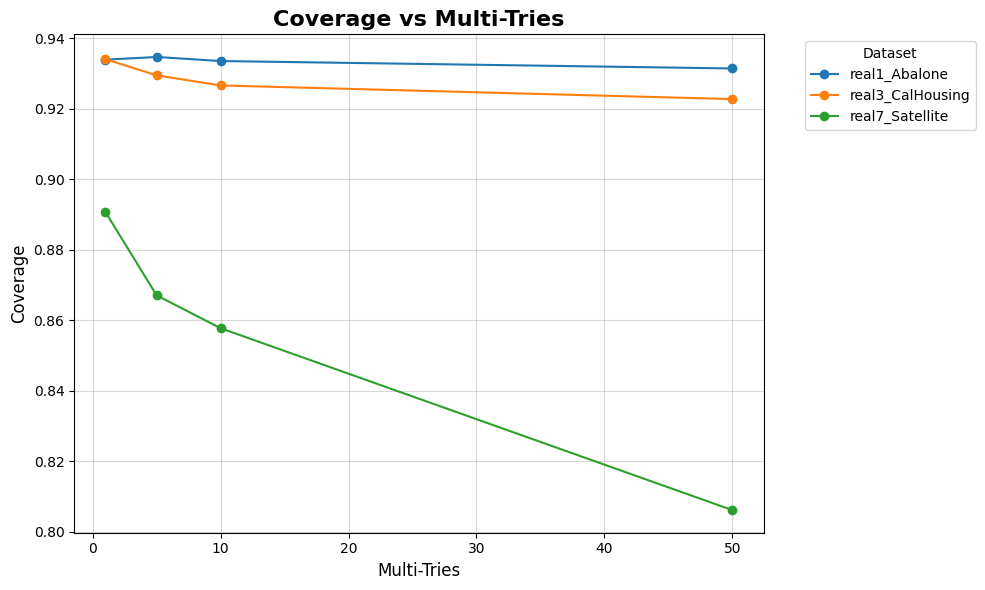

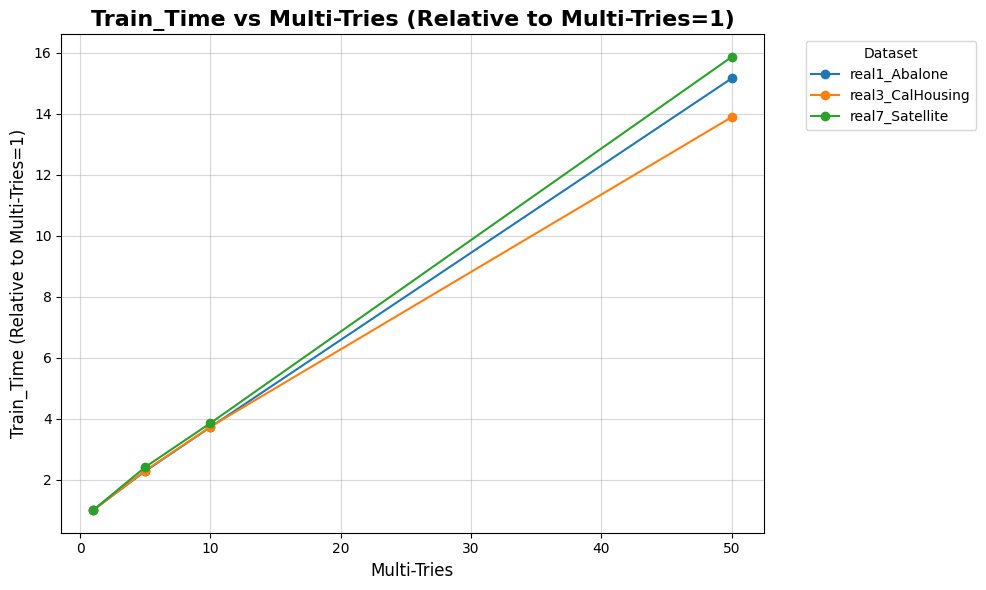

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Define datasets
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 'real7_Satellite']

# Results directory
results_dir = Path('results')

# Initialize a dictionary to store data for each metric
metric_data = {}

# Process each dataset's _tries.csv file
for dataset in datasets:
    file_path = results_dir / f"{dataset}_tries.csv"
    
    if file_path.exists():
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Extract the column names (excluding the first column 'multi_tries')
            metrics = df.columns[1:]
            
            # Store the data for each metric
            for metric in metrics:
                if metric not in metric_data:
                    metric_data[metric] = []
                metric_data[metric].append((dataset, df['multi_tries'], df[metric]))
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    else:
        print(f"File not found: {file_path}")

# Plot each metric
for metric, data in metric_data.items():
    plt.figure(figsize=(10, 6))
    
    for dataset, multi_tries, values in data:
        # Normalize Test_MSE and Train_Time relative to their values at multi-tries=1
        if metric in ['Test_MSE', 'Train_Time']:
            values = values / values.iloc[0]
        
        plt.plot(multi_tries, values, marker='o', label=dataset)
    
    plt.xlabel('Multi-Tries', fontsize=12)
    if metric in ['Test_MSE', 'Train_Time']:
        plt.ylabel(f'{metric} (Relative to Multi-Tries=1)', fontsize=12)
        plt.title(f'{metric} vs Multi-Tries (Relative to Multi-Tries=1)', fontsize=16, fontweight='bold')
    else:
        plt.ylabel(metric, fontsize=12)
        plt.title(f'{metric} vs Multi-Tries', fontsize=16, fontweight='bold')
    plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()